In [1]:
import os
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as sc
from imblearn.over_sampling import RandomOverSampler

# DataSet:

 Original Owner:

 R. K. Bock
 Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
 http://wwwmagic.mppmu.mpg.de
 rkb '@' mail.cern.ch

 Donor:

 P. Savicky
 Institute of Computer Science, AS of CR
 Czech Republic
 savicky '@' cs.cas.cz

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"

In [3]:
colname = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

In [4]:
df = pd.read_csv(path, names = colname)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df["class"].unique()

array([1, 0])

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [9]:
df.to_csv("E:\magic.csv")

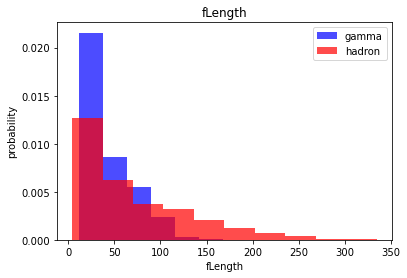

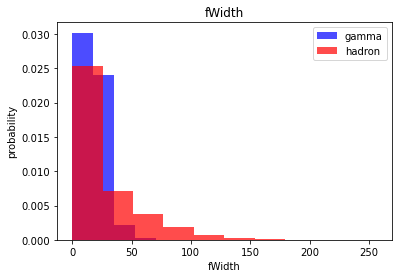

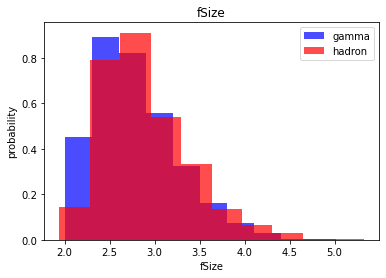

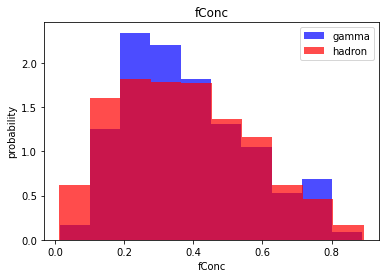

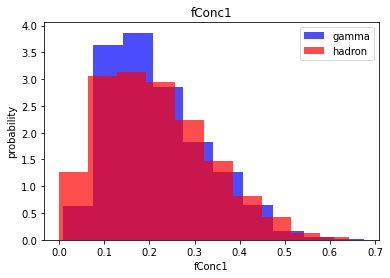

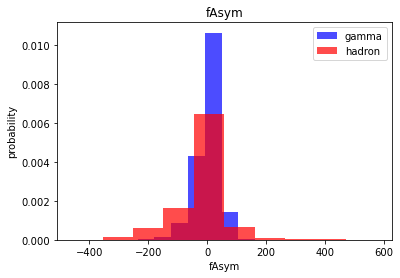

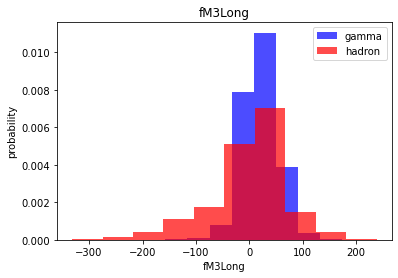

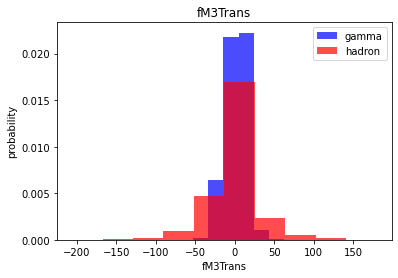

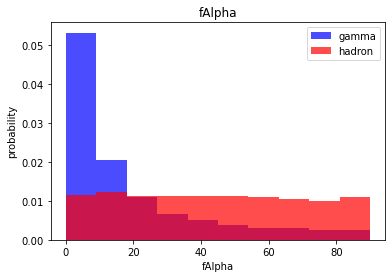

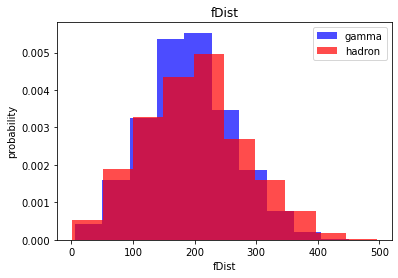

In [10]:
for label in colname[:-1]:
    plt.hist(df[df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train validation and test Datasets

In [11]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [12]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = sc()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    
    return data, x, y

In [13]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))

7357
4055


In [14]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# K-NN(K Nearest Neighbour)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(x_train, y_train)

In [26]:
y_pred = knn_model.predict(x_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1323
           1       0.85      0.86      0.86      2481

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [28]:
y_test

array([1, 0, 1, ..., 1, 1, 0])

In [29]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()

In [32]:
nb_model = nb_model.fit(x_train, y_train)
nb_model

GaussianNB()

In [37]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1323
           1       0.73      0.89      0.80      2481

    accuracy                           0.71      3804
   macro avg       0.69      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804

